In [1]:
#Import Modules & Package
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Membuka folder CSV

In [2]:
data = pd.read_csv(r"D:\Python\Project\Uber Data\Uber_Raw_data_Juni_2014.csv")

In [3]:
data

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512
...,...,...,...,...
663839,6/30/2014 22:40:00,40.7332,-73.9872,B02764
663840,6/30/2014 23:12:00,40.7905,-73.9796,B02764
663841,6/30/2014 23:13:00,40.7640,-73.9887,B02764
663842,6/30/2014 23:15:00,40.7262,-73.9944,B02764


# Mengubah bentuk Date/Time

In [5]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [6]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512


In [9]:
def get_dom(dt) :
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [17]:
def get_weekday(dt) :
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

In [15]:
def get_hour(dt) :
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

In [19]:
data.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512,1,6,0
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512,1,6,0
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512,1,6,0
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512,1,6,0
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512,1,6,0


# Analisis Data

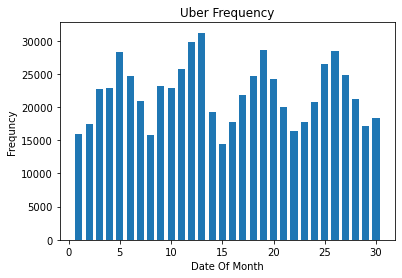

In [27]:
plt.hist(data.dom, bins = 30, rwidth = .7, range=(0.5, 30.5))
plt.xlabel("Date Of Month")
plt.ylabel("Frequncy")
plt.title("Uber Frequency")
plt.show()

# Analisa Per Jamnya

(array([14514.,  9167.,  6189.,  6937.,  7701., 11955., 22030., 30834.,
        29771., 24298., 23584., 24155., 54170., 34428., 41586., 48162.,
        50452., 45013., 38203., 40108., 40791., 35614., 24182.,     0.]),
 array([-0.5       ,  0.54166667,  1.58333333,  2.625     ,  3.66666667,
         4.70833333,  5.75      ,  6.79166667,  7.83333333,  8.875     ,
         9.91666667, 10.95833333, 12.        , 13.04166667, 14.08333333,
        15.125     , 16.16666667, 17.20833333, 18.25      , 19.29166667,
        20.33333333, 21.375     , 22.41666667, 23.45833333, 24.5       ]),
 <BarContainer object of 24 artists>)

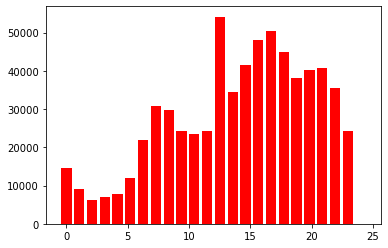

In [33]:
plt.hist(data.hour, bins = 24, rwidth = .8, range=(-0.5,24.5), color = 'red')

# Analisa Silang Dengan HeatMap

In [42]:
cross = data.groupby('weekday hour'.split()).size().unstack()
print(cross)

hour       0     1     2     3     4     5     6     7     8     9   ...  \
weekday                                                              ...   
0         912   512   420  1049  1712  2747  4674  6338  5971  4264  ...   
1         722   415   291   507   884  1680  3511  5064  4338  3075  ...   
2         996   522   394   644   937  1717  3833  5627  4793  3567  ...   
3        1363   751   479   751  1116  2108  4355  5993  5697  4357  ...   
4        1836  1112   687   952  1248  1838  3465  5122  5169  3934  ...   
5        3550  2362  1475  1298   844   911  1137  1391  1902  2443  ...   
6        5135  3493  2443  1736   960   954  1055  1299  1901  2658  ...   

hour       14    15    16    17    18    19    20    21    22    23  
weekday                                                              
0        4930  5758  6983  7306  5741  5243  5354  4771  3230  1911  
1        4739  5802  7224  8112  6578  5271  5920  5468  3654  1980  
2        5286  6561  7630  8195  73

<AxesSubplot:xlabel='hour', ylabel='weekday'>

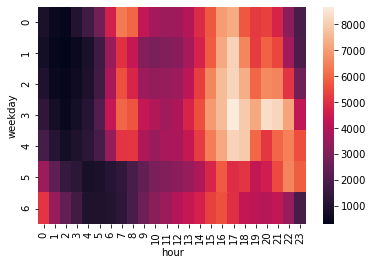

In [44]:
sb.heatmap(cross)

# Analisa Berdasar Longitude & Lattitude

(40.7, 41.0)

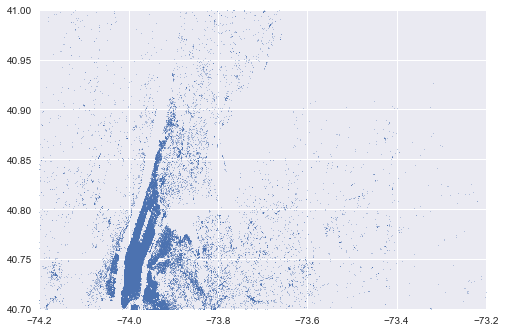

In [62]:
plt.style.use('seaborn')
plt.scatter(data['Lon'],data['Lat'],s = .3,alpha = .5)
plt.xlim(-74.2, -73.2)
plt.ylim(40.7, 41)
#membentuk titik titik di kota